## Об этом Notebook

В этом Notebook мы узнаем:
1. Как можно рисовать графики с помощью Pandas
2. Какие типы графиков можно рисовать
3. Познакомимся с функцией **plot()**, узнаем как строить графики с помощью двух разных способов

***

In [ ]:
# Выполни прежде чем проходить Notebook
from google.colab import drive
import os
drive.mount ('/content/gdrive', force_remount=True)

%run /content/gdrive/MyDrive/03_Data_Visualization/0_package_installation.ipynb
# Перезагрузка ядра
os.kill(os.getpid(), 9)

Mounted at /content/gdrive


# Визуализация с помощью Pandas
## 1. Введение
Библиотека Pandas позволяет создавать графики, чтобы лучше понимать данные. Основное преимущество заключается в том, что вы можете визуализировать данные, используя простые и понятные методы. За построение графиков с помощью Pandas отвечает другая Python библиотека - **Matplotlib**. Но сейчас не стоит беспокоиться о **Matplotlib**, так как мы рассмотрим ее в следующем Notebook. Итак, когда мы вызываем некоторую функцию визуализации с помощью Pandas, **Matplotlib** выступает в роли движка.

## 2. Набор данных
Мы будем работать с набором данных для обнаружения присутствия людей, который можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#).

Этот набор данных предназначен для решения задач бинарной классификации, присутствие или отсутсвие человека в комнате.

Давайте импортируем библиотеку Pandas и загрузим данные.

In [ ]:
# Импорт библиотек Pandas и Numpy
import pandas as pd
import numpy as np
# Пока что мы используем Matplotlib только для установки размеров графиков
import matplotlib.pyplot as plt
# rcParams озволяет нам установить глобальный размер для всего Notebook
plt.rcParams['figure.figsize'] = [10,6]
# В некоторых графиках мы определим размер полотна при вызове функции

In [ ]:
# Загружаем данные
data = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/room_occupancy.txt')

In [ ]:
# Просмотрим на первые 10 строк
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


In [ ]:
# Выведим количество строк и столбцов в датафрейме
data.shape

(9752, 7)

## 2.1 Описание атрибутов
Во-первых, давайте разберемся, с какими колонками мы имеем дело.
- **date**: конкретный день и время, когда были записаны значения
- **Temperature**: температура, измеряется в градусах Цельсия
- **Humidity**: относительная влажность, текущее состояние абсолютной влажности относительно максимальной влажности при той же температуре, выраженное в процентах
- **Light**: в единицах Lux
- **CO2**: в единицах ppm (частей на миллион)
- **HumidityRatio**: производная величиная от температуры и относительной влажности, выраженная в килограммах водяного пара на килограмм сухого воздуха
- **Occupancy**: присутствие челвоека в комнтае: заполненность комнаты была получена из фотографий, которые делались каждую минуту в течение 8 дней (1, если человек присутствует, 0 - отсутствует)

## 2.1.2 Изучение данных
Давайте посмотрим на тип данных переменных, используя атрибут **.dtypes**

In [ ]:
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

В наборе данных есть 6 числовых переменных. Почти все переменные были правильно интерпретированы в соответствии с их типами данных, за исключением переменной **'date'**, которую Python распознал как **object**. Преобразуйте тип данных **object** в тип данных **datetime** с помощью Pandas.

In [ ]:
# Преобразование переменной даты с помощью метода Pandas to_datetime
data['date'] = pd.to_datetime(data['date'])

Давайте проверим, есть ли пропущенные значения (**null значения или NaN**), о которых мы должны знать.

In [ ]:
# Изучаем описательную статистику нашего датафрейма
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [ ]:
# Проверяем наличие пустых значений
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## 3. Метод Plot
Фунция **.plot()** - это функция для рисования графиков, которая является оберткой функции **plot** в Matplotlib. По умолчанию она создает линейный график. Линейный график строится по каждой точке датафрейма, а затем рисует прямую непрерывную линию, соединяющую эти значения.

***

Если вызвать **.plot()** прямо на весь DataFrame, все переменные будут выведены на экран. Этот подход не совсем хорош, как вы можете видеть ниже. Есть несколько переменных с одинаковыми низкими значениями, поэтому они накладываются друг на друга.

<AxesSubplot: >

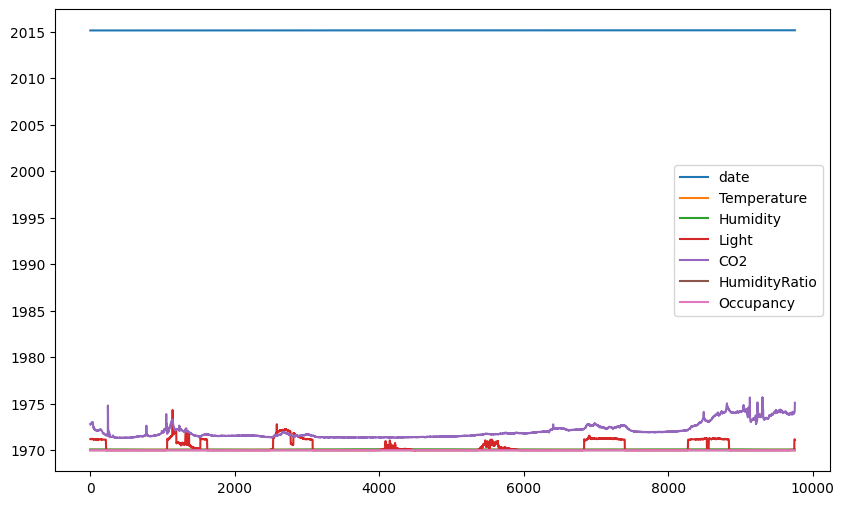

In [ ]:
# Создаем линейный график на весь датафрейм
data.plot()

Давайте создадим график с фиолетовой линии для переменной "Temperature". Вы можете выбрать нужную колонку, индексируя DataFrame квадратными скобками.

<AxesSubplot: >

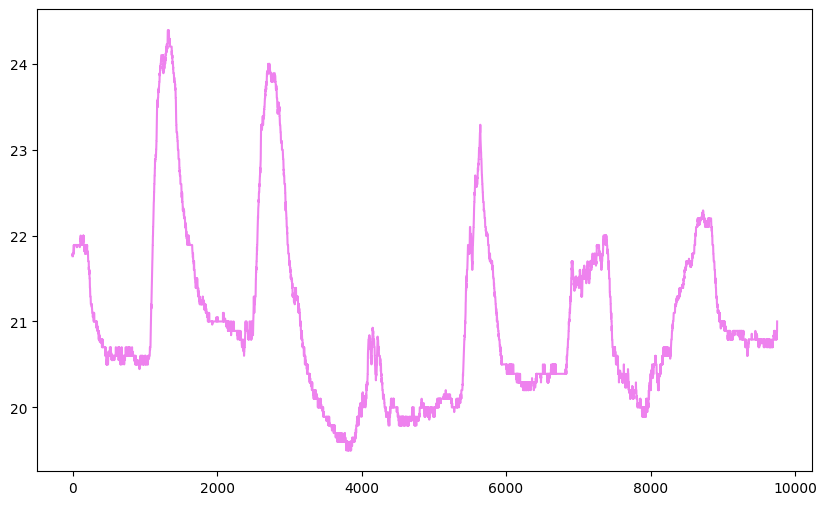

In [ ]:
# Построим линейный график переменной Temperature
data['Temperature'].plot(color = 'violet')

Теперь мы видим на графике только переменную Temperature с соответствующими значениями.

Вы видите,что функция `plot()` возвращает объект `AxesSubplot`. Но что это значит?

Пока запомните, что каждый график фактически представлен в виде объекта **Figure**, который служит основой. Помимо него существует объект **Axes**, в котором задаются оси графика x и y. В последней главе мы обсудим эти объекты более подробно. Чтобы избежать отображения метки `AxesSubplot` у графика, нужно поставить точку с запятой в конце исполняемой ячейки.

---

Также можно построить график по нескольким столбцам, передав список соответствующих колонок, разделенных запятой, в квадратных скобках, а затем вызвать метод **.plot()**. Pandas автоматически устанавливает цвета, и таким образом вы сможете различать колонки. При желании вы можете указать цвета линий в параметре **color**. Выбранные цвета нужно передать в словарь. Смотрите следующий пример:

```Python
 data[['переменная_1', 'переменная_2']].plot(color = {'переменная_1':'желтый', 'переменная_2': 'черный'})
 ```


Также легенда отображается по умолчанию.

**Попробуйте сделать это сами, выполнив следующее задание.**

### Задача 3.1
1. Создайте линейный график переменных **Temperature** и **Humidity**
2. Установите цвет для переменной Temperature - зеленый, для Humidity - синий.
3. На созданном графике обратите внимание, как Humidity и Temperature уменьшались или увеличивались.

In [ ]:
# Напишите свой код ниже:


## 3.1 Настройка параметров линейного графика
Можно построить график, где один столбец будет отображен по оси x, а другой по оси y, как показано в примере ниже. Мы указываем переменную **date** на оси x и переменную **CO2** на оси y. В методе **.plot()** можно задать несколько параметров, таких как заголовок, наименование осей, размер графика и т.д. Для получения дополнительной информации о настройках параметров см. [документацию](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

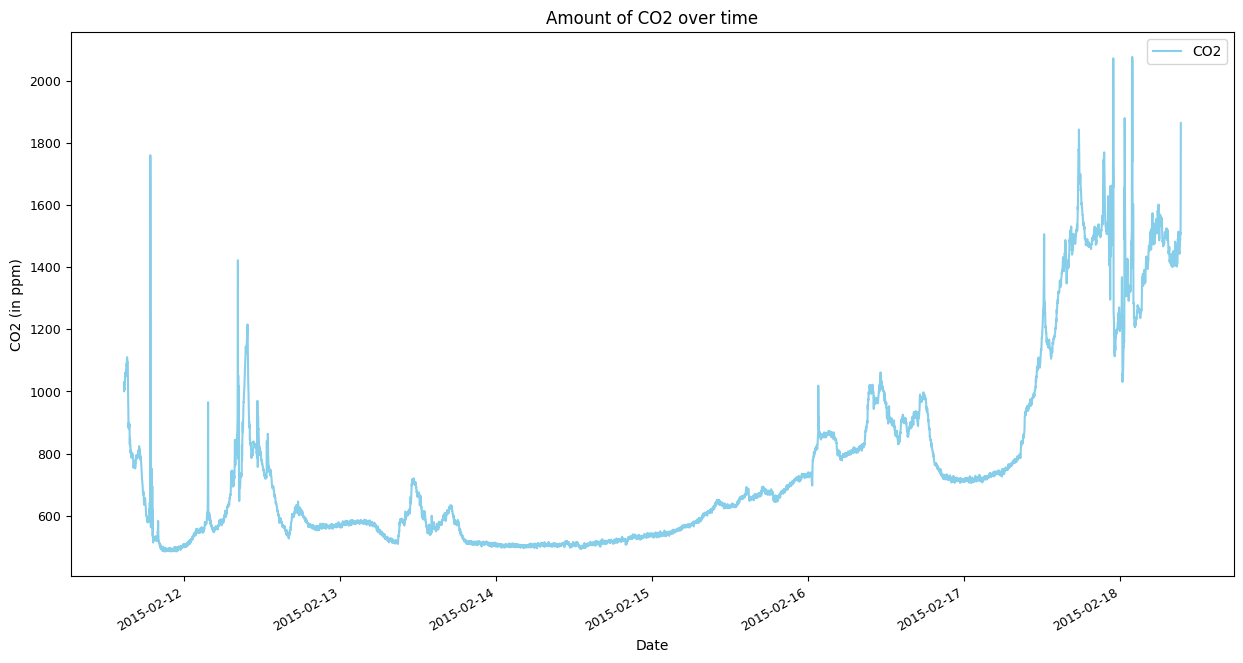

In [ ]:
# Линейный график количества CO2 в разрезе дат

data.plot(x = 'date', y = 'CO2',             # Указание переменных на осях
          figsize = (15,8),                  # Установка размера графика в виде кортежа
          fontsize = 9,                      # Установка размера шрифта
          color = 'skyblue',                 # Установка цвета
          title = 'Amount of CO2 over time', # Установка заголовка
          xlabel = 'Date',                   # Настройка наименования по оси x
          ylabel = 'CO2 (in ppm)');          # Настройка наименования по оси y

Линейный график показывает тенденцию изменения количества CO2 за период времени с 12.02.2015 (четверг) по 18.02.2015 (среда). На графике видно, как количество CO2 уменьшилось за выходные (14.02.2015 - 15.02.2015).

## 3.2 Подходы и типы рисования с помощью plot
Прежде чем перейти к другим типам plot, необходимо отметить один важный момент.
Существуют различные способы построения графика данных. Чтобы не запутаться в дальнейшем, давайте немного проясним этот момент.

В предыдущих примерах мы использовали функцию **plot()**, которая по **умолчанию** создает линейный график.

**Подход первый:**
- есть возможность выбрать другой тип графика с помощью plot, который вы хотите создать, используя параметр **kind**

Всего существует 10 типов графиков по plot, которые можно указать в качестве аргумента, представленного в виде строки:
- `hist`   - гистограмма  
- `box`    - ящик с усами
- `bar`    - вертикальная гистограмма
- `barh`   - горизонтальная гистограмма
- `scatter`- диаграмма рассеивания
- `pie`    - круговая диаграмма
- `kde`    - график плотности  
- `density`- график плотности  
- `area`   - график площади участка
- `hexbin` - график с шестигранными бинами

**Подход номер два:**
Все эти графики могут быть созданы с помощью соответствующих функций:

- `DataFrame.plot.line`
- `DataFrame.plot.hist`
- `DataFrame.plot.box`
- `DataFrame.plot.bar`
- `DataFrame.plot.barh`
- `DataFrame.plot.scatter`
- `DataFrame.plot.pie`
- `DataFrame.plot.kde`
- `DataFrame.plot.density`
- `DataFrame.plot.area`
- `DataFrame.plot.hexbin`

Для гистограммы и ящика с усами есть дополнительно две функции построения: `DataFrame.hist()` и `DataFrame.boxplot()`.

Только от вас и вашего вкуса зависит каким из двух подходов вы решите пользоваться.

## 3.2.1 Гистограмма
Гистограмма - это удобный график, позволяющий получить представление о разбросе точек данных. Она создает так называемые бины, которые можно представить как определенные диапазоны значений. Каждая точка данных попадает в соответствующий бин в соответствии с ее значением, и подсчитывается количество точек данных.

Посмотрите на некоторые статистические данные, вычисленные для переменной **'HumidityRatio'**. Мы знаем самое низкое и самое высокое значение коэффициента, среднее значение, а также то, что 50% перцентиль меньше **30.0045** и т.д. Но трудно представить, как выглядит распределение 9752 наблюдений на основе этой сводной статистики.

In [ ]:
# Посмотрите на описательную статистику с помощью метода .describe()
data.HumidityRatio.describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

Давайте создадим гистограмму для переменной **'HumidityRatio'**. Для этого можно использовать метод **.plot()** и указать в нем **kind = "hist"**. Опять же, мы выбираем нужный нам столбец, индексируясь в DataFrame. Поскольку функция plot возвращает объект **matplotlib.axes.AxesSubplot**, мы ожем задавать наименования осей сами.

`plt.xlabel` для оси x \
`plt.ylabel` для оси y

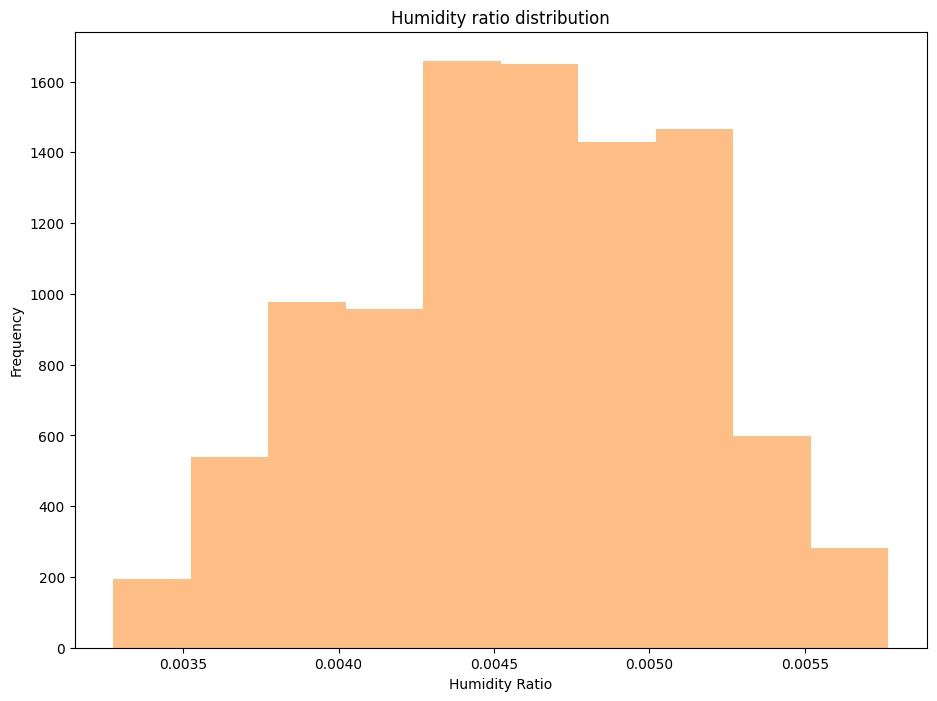

In [ ]:
# Коэффициент влажности
data['HumidityRatio'].plot(kind ='hist',
                      figsize = (11,8),
                      color = '#ff7f0e',
                      alpha = .5, # Настройка прозрачности цвета
                      title = 'Humidity ratio distribution')

plt.xlabel('Humidity Ratio');     # Указываем наименование оси x

Теперь мы можем увидеть все 9752 точек данных, построенных на одном графике. На полученном графике мы видим, что значения распределены в диапазоне от 0,003 до 0,005. Большинство точек данных лежит в диапазоне значений от 0,0043 до 0,0047.

По умолчанию этот метод разделяет все записи на 10 бинов. Чтобы проверить, точно ли наш результирующий график отражает данные, мы должны попробовать использовать разное количество бинов. При использовании разного количества бинов внешний вид гистограммы будет меняться

### Задача 3.2
1. Создайте гистограмму "Humidity" таким же образом, как описано выше. Попробуйте самостоятельно изменить количество бинов и понаблюдайте за результатом
2. Поиграйте и измените размер графика и его прозрачность, чтобы увидеть различия
3. Установите легенду на оси x как "Относительная влажность (%)".
4. Измените стандартную легенду для оси y (Частота) на "Число случаев".

In [ ]:
# Начните свой код ниже:


Применяя метод **.hist()** к DataFrame, мы можем создать гистограмму выбранного столбца или столбцов. Также можно визуализировать распределение колонок всего набора данных.

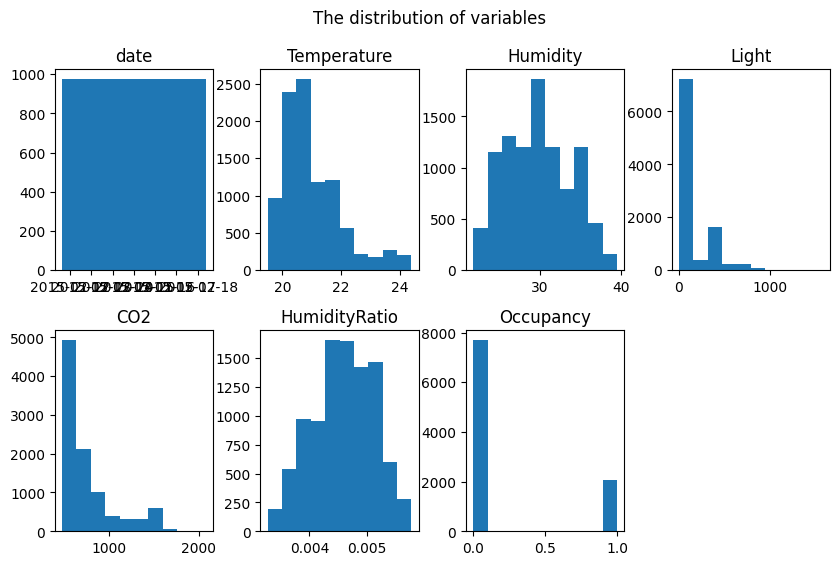

In [ ]:
# Распределение данных для всего DataFrame

data.hist(layout=(2,4), grid = False)          # Установка расположения графиков в 2 строки и 4 столбца, и отключение сетки
plt.suptitle('The distribution of variables'); # Добавление названия графика с помощью Matplotlib

## 3.2.2 Ящик с усами
Другой подход к визуализации распределения данных - использование ящиков с усами. Более того, полученный график будет включать пять чисел: наименьшее значение точки данных, первый квартиль (1Q), медиану (Q2), третий квартиль (Q3) и наибольшее значение точки данных.
Ящик с усами могут показать нам, есть ли возможные выбросы и
является ли распределение данных перекошенным или скорее симметричным.

Для построения ящика с усами можно использовать метод **.plot()**, указав в качестве аргумента ключевое слово **kind = 'box'**.Если мы хотим настроить такие вещи, как цвет, ширину или стиль линий, мы можем использовать параметры **boxprops**,**whiskerprops**,**medianprops** и **capprops**.

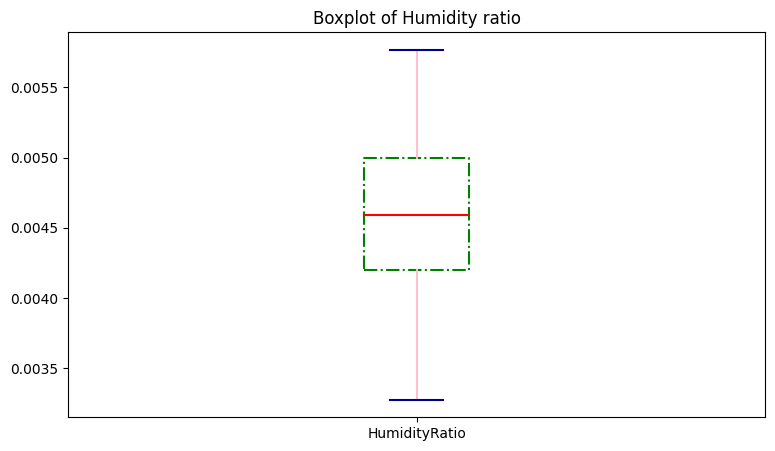

In [ ]:
# Ящик с усами относительной влажности

data['HumidityRatio'].plot(kind = 'box',
                           figsize = (9,5),
                           boxprops = dict(linewidth = 1.5, color = 'green',linestyle = '-.'),# Настройка ящика с усами
                           whiskerprops = dict(linewidth = 1.5, color = 'pink'),              # Настройка усов
                           medianprops = dict(linewidth = 1.5, color = 'red'),                # Настройка медианной линии
                           capprops = dict(linewidth = 1.5, color = 'darkblue'),              # Настройка цвета усов
                           title = 'Boxplot of Humidity ratio',
                              );

Этот график иллюстрирует, как распределены значения коэффициента влажности. По форме видно, что распределение довольно симметричное, а также отсутствуют экстремальные значения, то есть выбросы. Зеленый пунктирный прямоуголник представляет 50% записей вместе с медианным значением, которое отображается в виде красной линии. Вы можете вернуть фактические значения (квартили/перцентили) с помощью функции quantile.

In [ ]:
# Вычисляем 25-й процентиль, медианное значение и 75-й процентиль переменной HumidityRatio
perc_25, median, perc_75 = data.HumidityRatio.quantile([.25,.5,.75])

In [ ]:
# Выводим результат
perc_25, median, perc_75

(0.004196307174011725, 0.0045933097710052, 0.004997965656951225)

Альтернативой в Pandas является использование встроенного метода **pandasDataFrame.boxplot()**. Поскольку ящики с усами действительно полезны при сравнении двух или более групп, мы рассмотрим количество углекислого газа (CO2) в зависимости от присутствия человека. Выбор групп, которые вы хотите сравнить, можно сделать с помощью параметра **by** с соответствующей переменной. Мы отрегулируем размер фигуры и переименуем легенду x-tick.

Разделительная сетка отображается по умолчанию.  Вы можете отключить отображение сетки, задав параметр **grid = False**.

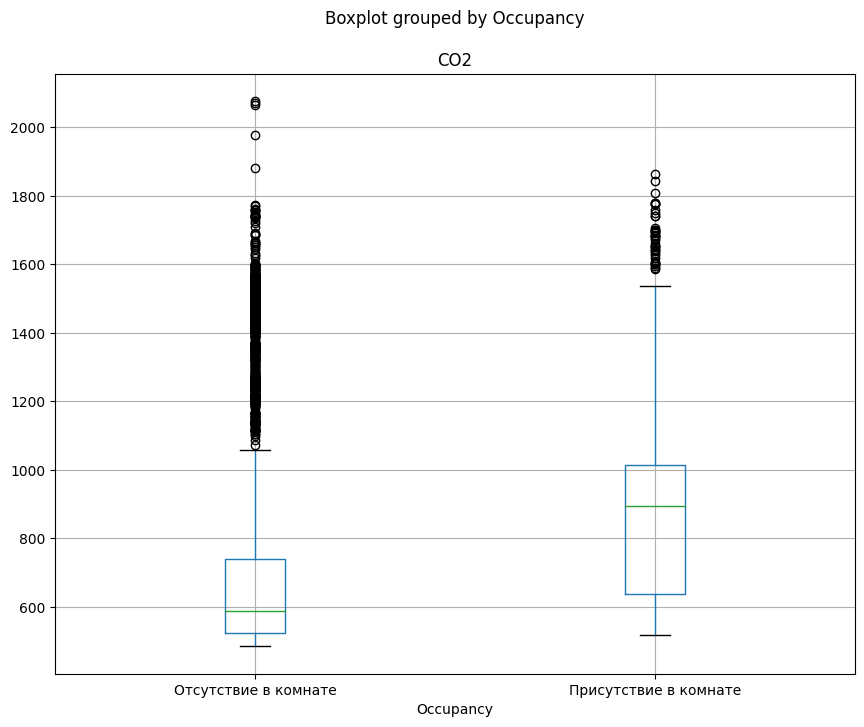

In [ ]:
# Ящик с усами CO2 в зависимости от присутствия человека

data.boxplot(figsize = (10,8),
             column = 'CO2',
             by = 'Occupancy')

# Настраиваем наименования по оси x в зависимости от группы
plt.xticks([1,2], ['Отсутствие в комнате','Присутствие в комнате']);

Сравнение распределения двух групп может помочь нам лучше понять данные. На графиках сразу видна разница в количестве **CO2**. Когда комната занята, количество углекислого газа выше, при этом 50% точек данных имеют значения в диапазоне от около 620 до чуть выше 1000 ppm. Также можно заметить, что совершенно разные медианные значения у обоих групп. Когда комната пустая, количество углекислого газа значительно ниже, хотя график показывает много выбросов.

## 3.2.3 Столбчатая гистограмма
Столбчатые гистограммы полезны, когда мы хотим сравнить категориальные данные на основе их значений. Каждая из категорий будет откладываться на оси x, а высота столбиков будет представлять соответствующие значения.

Для наглядности создадим простой DataFrame студентов и их оценок за экзамен.

In [ ]:
# Пример данных

sample_data = pd.DataFrame({'Student': ['Thomas','Margaret','Lisa','John','Elis','Sally','Marc','Angela','Sebastian'],
                            'Score': [78,50,68,83,99,98,65,90,85],
                            'Class': ['A','B','B','B','A','A','A','B','A']})
sample_data

,Student,Score,Class
0,Thomas,78,A
1,Margaret,50,B
2,Lisa,68,B
3,John,83,B
4,Elis,99,A
5,Sally,98,A
6,Marc,65,A
7,Angela,90,B
8,Sebastian,85,A


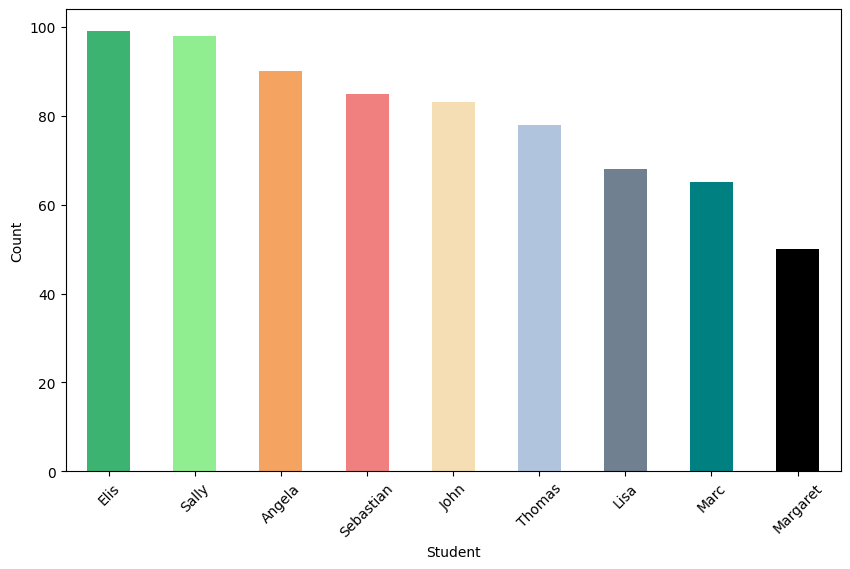

In [ ]:
# Вертикальная гистограмма студентов по их оценкам

sample_data.sort_values(by = 'Score', ascending = False).plot(x = 'Student',
                                                              y = 'Score',
                                                              kind = 'bar',
                                                              rot = 45,
                                                              color = ['mediumseagreen','lightgreen','sandybrown',
                                                                      'lightcoral','wheat','lightsteelblue',
                                                                      'slategrey','teal','black'],
                                                              legend = False,
                                                              ylabel = 'Count');
# plt.ylabel('Count');

Для создания гистограммы мы сортируем значения баллов по убыванию, чтобы отобразить баллы студента. Если категории имеют длинные наименования, то целесообразно отобразить их под углом, чтобы избежать наложения. Вы можете явно задать цвет каждого столбика, указав название цвета в параметре **color**.

Вы также можете выбрать одну из встроенных цветовых карт в Matplotlib. Доступ к ним  можно получить через **plt.cm** (cm означает colormap). После этого укажите выбранную цветовую карту по ее имени. Обратную версию каждой доступной цветовой карты можно сделать, добавив **_r** к имени цветовой карты. Используя функцию Numpy **arange()**, можно указать интервал цветов, которые мы хотим выбрать.

### Задача 3.3
1. Используйте код выше и создайте горизонтальную гистограмму **(kind = 'barh')** баллов студентов.
2. Установите цветовые карты с помощью кода: **plt.cm.Set3_r(np.arange(len(sample_data)))**
3. Отключите легенду
4. Установите легенду для оси x как **'Count'**

In [ ]:
# Начните писать свой код ниже:


Для визуализации количества учащихся в зависимости от того, в каком классе они учатся, мы подсчитываем количество студентов в классе А и B, и строим график.

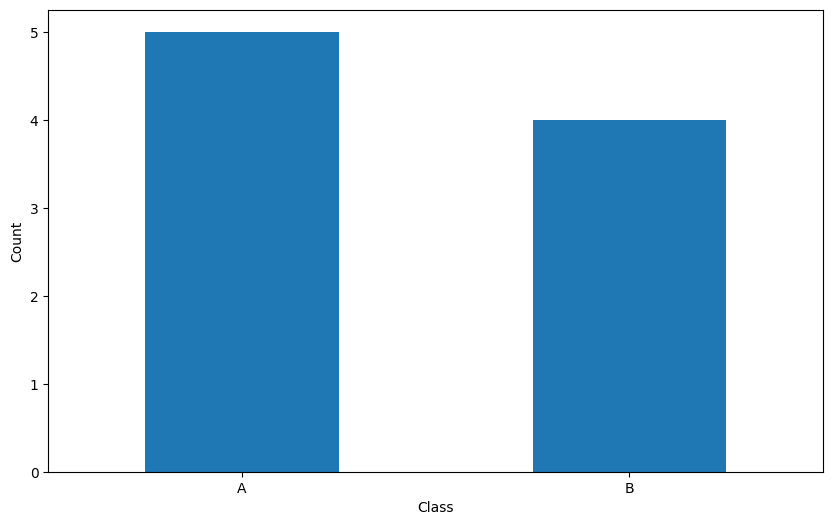

In [ ]:
sample_data.Class.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Class')
plt.ylabel('Count');

## 4. Время для практики
Для дальнейшей визуализации мы будем использовать данные, связанные с привычками людей в плане питания, транспорта и устройств, которые они используют, а также их физическое состояние. Этот набор данных можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#).

In [ ]:
# Читаем данные
data_ob = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/obesity_data.csv')

In [ ]:
# Посмотрим на данные
data_ob

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 4.1 Рассказываем про атрибуты
Первые 5 переменных включают основную информацию о человеке, а также информацию о наличии избыточного веса в семье.
- Gender: пол
- Age: возраст
- Height: рост
- Weight: вес
- family_history_with_overweight: член семьи, имеющий/имевший избыточный вес.

Переменные, связанные с привычками питания:
- FAVC: часто ли человек потребляет высококалорийную пищу
- FCVC: как часто овощи используются в основных блюдах
- NCP: количество основных приемов пищи в день
- CAEC: употребление любой пищи между основными приемами пищи
- SMOKE: курение
- CH2O: потребление воды в день

Переменные, связанные с физическим состоянием:
- SCC: отслеживание потребляемых калорий
- FAF: частота физической активности
- TUE: использование технологических устройств в день
- CALC: потребление алкоголя
- MTRANS: вид транспорта, на котором передвигается

Последняя переменная **"NObeyesdad"** была создана с использованием уравнения для BMI (индекс массы тела) для каждого человека. Полученные значения сравнивались с данными ВОЗ (Всемирной организации здравоохранения) и мексиканскими нормативами.

Расшифровка данной переменной:
- Низкий вес (< 18,5)
- Нормальный (18,5 - 24,9)
- Избыточный вес (25 - 29,9)
- Ожирение I (30-34,9)
- Ожирение II (35 - 39)
- Ожирение III (> 40)

## 4.1 Изучение данных


In [ ]:
# Проверяем тип данных переменных
data_ob.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
# Изучаем описательную статистику датафрейма
data_ob.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Проверяем на наличие пустых, пропущенных значений
data_ob.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# Наличие дублирующих строк
data_ob.duplicated().sum()

24

In [ ]:
# Удаление дублируюших строк
data_ob.drop_duplicates(inplace = True)

### Задача 4
1. Создайте ящик усов с переменной **Age**
2. Задайте размер графика (10,8)

In [ ]:
# Начните писать свой код ниже:


Что вы можете сказать о распределении возрастов? Сколько лет большинству людей? Является ли распределение симметричным или есть люди, которые
старше большинства?

### Задача 5
1. Визуализация распределения переменой **Weight** с помощью столбчатой гистограммы.
2. Отключите линию сетки
3. Попробуйте поиграться, указав разное кол-во бинов  

In [ ]:
# Начните писать свой код ниже:


Исходя из гистограммы, какой вес является наиболее распространенным? Выглядит ли это распределение симметричным или скорее бимодальным? Может ли другое количество бинов лучше отобразить данные?

### Задача 6
1. Создайте нормализованную столбчатую гистограмму по колонке **Gender**, указав параметр **normalize = True**, чтобы получить проценты
2. Присвойте мужчинам и женщинам разные цвета (мужчинам - 'salmon', женщинам - 'skyblue').
3. Добавьте заголовок: **'Proportion of gender'**
4. Укажите легенду по оси x для мужчин **Male**, для женщин **Female**
5. Легенду по оси y **The precentage**

In [ ]:
# Начните писать свой код ниже:


### Задача 7
1. Создайте ящик с усами по колонке **Age** в разрезе колонки **Gender**

In [ ]:
# Начните писать свой код ниже:


Сравните диапазоны значений для мужчин и женщин: распределение похожи или есть различия? Видите ли вы какие-либо выбросы?

### Задача 8  
1. Выясните, сколько людей часто едят высококалорийную пищу ('FAVC')
2. Установите угол наклона наименований групп по оси x на 0 градусов

In [ ]:
# Начните писать свой код ниже:


Вопрос, который мы можем задать относительно уровня ожирения, может звучать следующим образом: "Какие люди более склонны к ожирению в зависимости от их возраста?" или "Имеют ли молодые, взрослые избыточный вес?".

Давайте посмотрим, сколько существует уникальных значений в колонке **'Nobeyesdad'**. Мы вызывем функцию  **.value_counts()** для переменной **'Nobeyesdad'** и отсортируем категории по уровню ожирения.

In [ ]:
# Подсчет значений уровней ожирения
data_ob.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

Мы определим порядок уровней ожирения в списке и присвоим его переменной **obesity_levels**.

In [ ]:
# Упорядочиваем категории
obesity_levels = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Затем мы создаем **CategoricalDtype** колонку, где указываем категории и упорядоченность.

In [ ]:
# Создание CategoricalDtype
ob_level = pd.api.types.CategoricalDtype(ordered = True, categories = obesity_levels)

Последний шаг - преобразование исходного типа данных переменной **'.NObeyesdad'** в созданный **CategoricalDtype**.

In [ ]:
# Преобразование 'NObeyesdad' в созданный categoricalDtype
data_ob.NObeyesdad = data_ob.NObeyesdad.astype(ob_level)

Мы можем построить график уровней ожирения, чтобы увидеть, как они меняются в зависимости от возраста людей. Чтобы избежать наложения названий меток этих категорий, можно установить угол отображения наименований категорий под 45 градусов с помощью параметра **rot**. Также отключение линий сетки поможет сделать визуализацию более понятной.

### Задача 9
1. Создайте ящик с усами по столбу **Age** в разрезе столбца **NObeyesdad**
2. Установите размер графика: (10,8)
3. Установите наименвания по оси x на 45 градусов с помощью параметра **rot**
4. Отключите линию сетки

In [ ]:
# Начните писать свой код ниже:


Глядя на созданный график, можете ли вы увидеть какую-то закономерность? В каком возрасте люди обычно страдают от того или иного уровня ожирения?

### Задача 10
1. Постройте гистограмму по колонке **MTRANS** и выясните сколько людей пользуются каким видом транспорта
2. Установите угол наклона наименваний по оси x на 45 с помощью параметра **rot**
3. Узнайте какой самый популярный вид транспорта?

In [ ]:
# Начните писать свой код ниже:


Отфильтруем только тех людей, которые пользуются автомобилем для передвижения или ходят пешком. Затем посмотрим на их вес.

In [ ]:
# Отфильтруем только те строки, где вид транспорта - 'Автомобиль' и 'Пешком'
# DataFrame.query будет более подробно рассмотрен в последнем Notebook, поэтому сейчас не беспокойтесь об этом.
subset_transport = data_ob.query('MTRANS in ["Automobile","Walking"]')

### Задача 11
1. Создайте ящик с усами только что полученного подмножества subset_transport
2. Установите размер графика: (10,8)
3. Установите 'Weight' в параметр колонки и 'MTRANS' в параметр **by**
4. Установите наименования по оси x на 45 градусов с помощью параметра **rot**
5. Отключите линию сетки

In [ ]:
# Начните писать свой код ниже:


Что вы можете сказать о распределении этих двух групп людей? Какая группа имеет меньший общий вес? Глядя на ящики с усами, я думаю, что это в какой-то степени мотивирует всех нас задуматься о типе транспорта в следующий раз, когда нам нужно будет куда-то ехать :)